# 重新学习tensorflow

1.tensorflow是通过会话sess来执行运算  
sess.run（函数）执行函数，sess.run(变量)打印变量  
2.variable来保存张量，使用前需要执行initialize_all_variables()来初始化  
使用此变量可以保存权重和偏差

## 基本概念

### tf.Variable

训练模型时，需要使用变量(Variables)保存和更新参数。Variables是包含张量(tensor)的内存缓冲。变量必须要先被初始化(initialize)，而且可以在训练时和训练后保存(save)到磁盘中。之后可以再恢复(restore)保存的变量值来训练和测试模型  
在运行模型中其他操作之前，必须先对变量进行初始化。  
使用tf.global_variables_initializer()添加一个op来运行初始化。要在完全构建完模型后，在一个对话(Session)中运行它。

### tf.constant

tf.constant(value, dtype=None, shape=None, name=’Const’) 
创建一个常量tensor，按照给出value来赋值，可以用shape来指定其形状。value可以是一个数，也可以是一个list。 如果是一个数，那么这个常亮中所有值的按该数来赋值。 如果是list,那么len(value)一定要小于等于shape展开后的长度。赋值时，先将value中的值逐个存入。不够的部分，则全部存入value的最后一个值。

### tf.assign  
通过将 "value" 赋给 "ref" 来更新 "ref"。
此操作输出在赋值后保留新值 "ref" 的张量。这使得更易于链接需要使用重置值的操作。

### tf.cast

tf.cast(x, dtype, name=None)  
参数
x：输入
dtype：转换目标类型
name：名称

### tf.placeholder

此函数可以理解为形参，用于定义过程，在执行的时候再赋具体的值  
tf.placeholder(dtype, shape=None, name=None)   
dtype：数据类型。常用的是tf.float32,tf.float64等数值类型  
shape：数据形状。默认是None，就是一维值，也可以是多维，比如[2,3], [None, 3]表示列是3，行不定  
name：名称。

### tf.train.slice_input_producer  
tf.train.slice_input_producer(tensor_list, num_epochs=None, shuffle=True, seed=None, capacity=32, shared_name=None, name=None)  
**tf.train.slice_input_producer是一个tensor生成器，作用是按照设定，每次从一个tensor列表中按顺序或者随机抽取出一个tensor放入文件名队列**  
第一个参数 tensor_list：包含一系列tensor的列表，表中tensor的第一维度的值必须相等，即个数必须相等，有多少个图像，就应该有多少个对应的标签。  
第二个参数num_epochs: 可选参数，是一个整数值，代表迭代的次数，如果设置 num_epochs=None,生成器可以无限次遍历tensor列表，如果设置为   num_epochs=N，生成器只能遍历tensor列表N次。  
第三个参数shuffle： bool类型，设置是否打乱样本的顺序。一般情况下，如果shuffle=True，生成的样本顺序就被打乱了，在批处理的时候不需要再次打乱样  本，使用 tf.train.batch函数就可以了;如果shuffle=False,就需要在批处理时候使用 tf.train.shuffle_batch函数打乱样本。  
第四个参数seed: 可选的整数，是生成随机数的种子，在第三个参数设置为shuffle=True的情况下才有用。  
第五个参数capacity：设置tensor列表的容量。  
第六个参数shared_name：可选参数，如果设置一个‘shared_name’，则在不同的上下文环境（Session）中可以通过这个名字共享生成的tensor。  
第七个参数name：可选，设置操作的名称。  
**tf.train.slice_input_producer定义了样本放入文件名队列的方式，包括迭代次数，是否乱序等，要真正将文件放入文件名队列，还需要调用tf.train.start_queue_runners 函数来启动执行文件名队列填充的线程，之后计算单元才可以把数据读出来，否则文件名队列为空的，计算单元就会处于一直等待状态，导致系统阻塞**

### tf.read_file

tf.read_file(filename,name=None)  
filename: A Tensor of type string.  
name: A name for the operation (optional).  
example:  
    image_value = tf.read_file('test/a.jpg')

### tf.image.decode_jpeg  
Decode a JPEG-encoded image to a uint8 tensor.  
### tf.image.resize_image_with_crop_or_pad  
剪裁或填充处理，会根据原图像的尺寸和指定的目标图像的尺寸选择剪裁还是填充，如果原图像尺寸大于目标图像尺寸，则在中心位置剪裁，反之则用黑色像素填充。  
### tf.image.per_image_standardization(image)  
此函数的运算过程是将整幅图片标准化（不是归一化），加速神经网络的训练, 标准化处理可以使得不同的特征具有相同的尺度（Scale),对图像进行标准化：减去均值并除以像素的方差  

### tf.train.batch  
tf.train.batch([example, label], batch_size=batch_size, capacity=capacity)：[example, label]表示样本和样本标签，这个可以是一个样本和一个样本标签，batch_size是返回的一个batch样本集的样本个数。capacity是队列中的容量。这主要是按顺序组合成一个batch

### tf.reshape  
tf.reshape(tensor,shape,name=None)  
函数的作用是将tensor变换为参数shape形式，其中的shape为一个列表形式  
```
tensor = tf.constant([1, 2, 3, 4, 5, 6, 7,8])
tensorReshape = tf.reshape(tensor,[2,4])  
print(sess.run(tensorReshape))
 
[[1 2 3 4]
 [5 6 7 8]]
```

### tf.train.Coordinator  
使用 tf.train.Coordinator()来创建一个线程管理器（协调器）对象 
**
1. 调用 tf.train.slice_input_producer，从 本地文件里抽取tensor，准备放入Filename Queue（文件名队列）中;
2. 调用 tf.train.batch，从文件名队列中提取tensor，使用单个或多个线程，准备放入文件队列;
3. 调用 tf.train.Coordinator() 来创建一个线程协调器，用来管理之后在Session中启动的所有线程;
4. 调用tf.train.start_queue_runners, 启动入队线程，由多个或单个线程，按照设定规则，把文件读入Filename Queue中。函数返回线程ID的列表，一般情况下，系统有多少个核，就会启动多少个入队线程（入队具体使用多少个线程在tf.train.batch中定义）;
5. 文件从 Filename Queue中读入内存队列的操作不用手动执行，由tf自动完成;
6. 调用sess.run 来启动数据出列和执行计算;
7. 使用 coord.should_stop()来查询是否应该终止所有线程，当文件队列（queue）中的所有文件都已经读取出列的时候，会抛出一个 OutofRangeError 的异常，这时候就应该停止Sesson中的所有线程了;
8. 使用coord.request_stop()来发出终止所有线程的命令，使用coord.join(threads)把线程加入主线程，等待threads结束。
**

### sess.run() 中的feed_dict

feed_dict的作用是给使用placeholder创建出来的tensor赋值   
```x = tf.placeholder(tf.string)  
with tf.Session() as sess:  
    output = sess.run(x, feed_dict={x: 'Hello World'})
```

### tf.reduce_mean  
计算张量的各个维度上的元素的平均值

### tf.reduce_sum

reduce_sum( input_tensor, axis=None, keep_dims=False, name=None, reduction_indices=None)  
说明：reduce_sum() 就是求和，由于求和的对象是tensor，所以是沿着tensor的某些维度求和。函数名中加了reduce是表示求和后会降维，当然可以通过设置参数来保证不降维，但是默认就是要降维的  
参数解释：1）input_tensor：输入的张量。2）axis：沿着哪个维度求和。对于二维的input_tensor张量，0表示按列求和，1表示按行求和，[0, 1]表示先按列求和再按行求和。3）keep_dims：默认值为Flase，表示默认要降维。若设为True，则不降维。4）name：名字。5）reduction_indices：默认值是None，即把input_tensor降到 0维，也就是一个数。对于2维input_tensor，reduction_indices=0时，按列；reduction_indices=1时，按行。注意，reduction_indices与axis不能同时设置  
``
x = tf.constant([[1, 1, 1], [1, 1, 1]])
tf.reduce_sum(x, 0)  # 对 tensor 的 0 级进行求和，[1,1,1] + [1,1,1] =  [2, 2, 2]
tf.reduce_sum(x, 1)  # 对 tensor 的 1 级进行仇和，[1+1+1, 1+1+1] = [3, 3]
tf.reduce_sum(x, 1, keep_dims=True)  # 对第 1 级进行求和，但不降维, [[3], [3]]
tf.reduce_sum(x, [0, 1])  # 0 级和 1级都要求和，6
tf.reduce_sum(x)  # 因为 x 只有 2 级，所以结果同上一个，6
``

### tf.random_normal | tf.truncated_normal | tf.random_uniform  
tf.random_normal(shape,mean=0.0,stddev=1.0,dtype=tf.float32,seed=None,name=None) 
tf.truncated_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None) 
tf.random_uniform(shape,minval=0,maxval=None,dtype=tf.float32,seed=None,name=None) 
这几个都是用于生成随机数tensor的。尺寸是shape 
random_normal: 正太分布随机数，均值mean,标准差stddev 
truncated_normal:截断正态分布随机数，均值mean,标准差stddev,不过只保留[mean-2*stddev,mean+2*stddev]范围内的随机数 
random_uniform:均匀分布随机数，范围为[minval,maxval]

### 优化器Optimizer

优化器最后其实就是各种对于梯度下降算法的优化   
优化器（optimizers）类的基类。这个类定义了在训练模型的时候添加一个操作的API。你基本上不会直接使用这个类，但是你会用到他的子类比如GradientDescentOptimizer, AdagradOptimizer, MomentumOptimizer.等等这些。  
f.train.GradientDescentOptimizer 梯度下降算法的优化器

### 一些imort

1. from __future__ import print_function  
这是 python 2 的概念,Python提供了__future__模块，把下一个新版本的特性导入到当前版本，于是我们就可以在当前版本中测试一些新版本的特性,显然 python 3 对于 python2 就是 future了

## 例子

### tf5 example

In [5]:
"""
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
from __future__ import print_function

import tensorflow as tf
import numpy as np

# create data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3

### create tensorflow structure start ###
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
#训练模型时，需要使用变量(Variables)保存和更新参数
biases = tf.Variable(tf.zeros([1]))

y = Weights*x_data + biases

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()
### create tensorflow structure end ###

sess = tf.Session()
sess.run(init)          # Very important

for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(Weights), sess.run(biases))

0 [ 0.56615776] [ 0.07958651]
20 [ 0.20517485] [ 0.24692354]
40 [ 0.12403726] [ 0.2878696]
60 [ 0.10549362] [ 0.29722765]
80 [ 0.10125554] [ 0.29936641]
100 [ 0.10028695] [ 0.2998552]
120 [ 0.10006559] [ 0.2999669]
140 [ 0.10001498] [ 0.29999244]
160 [ 0.10000344] [ 0.29999828]
180 [ 0.10000079] [ 0.29999962]
200 [ 0.10000017] [ 0.29999992]


### tf 6 example 矩阵乘法

In [6]:
"""
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
from __future__ import print_function
import tensorflow as tf

matrix1 = tf.constant([[3, 3]])
matrix2 = tf.constant([[2],
                       [2]])
product = tf.matmul(matrix1, matrix2)  # matrix multiply np.dot(m1, m2)

# method 1
sess = tf.Session()
result = sess.run(product)
print(result)
sess.close()

# method 2
with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)

[[12]]
[[12]]


### tf 7 variable

In [9]:
 """
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
from __future__ import print_function
import tensorflow as tf

state = tf.Variable(0, name='counter')
#print(state.name)
one = tf.constant(1)

new_value = tf.add(state, one)
update = tf.assign(state, new_value)

init = tf.initialize_all_variables()  # must have if define variable

with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

1
2
3


### tf 8 feeds

In [2]:
"""
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
from __future__ import print_function
import tensorflow as tf

input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
ouput = tf.multiply(input1, input2)

with tf.Session() as sess:
    print(sess.run(ouput, feed_dict={input1: [7.], input2: [2.]}))

[ 14.]


### tf 10 def_add_layer

In [3]:
"""
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
from __future__ import print_function
import tensorflow as tf


def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

### tf 11 build_network

In [4]:
"""
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
from __future__ import print_function
import tensorflow as tf
import numpy as np

def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# Make up some real data
x_data = np.linspace(-1,1,300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])
# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediciton and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# important step
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to see the step improvement
        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0.0771344
0.00979138
0.00837933
0.00806125
0.00780825
0.00757348
0.0073305
0.00706471
0.0067982
0.00654175
0.00627767
0.00602692
0.00579069
0.00557295
0.00537355
0.00518675
0.00500312
0.00482633
0.00466048
0.00451485


### tf 11 plot_result

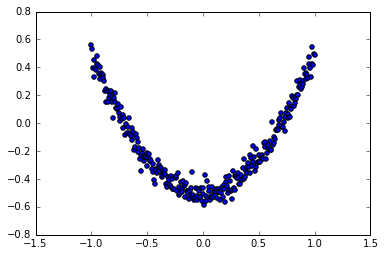

In [5]:
"""
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# Make up some real data
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

##plt.scatter(x_data, y_data)
##plt.show()

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])
# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediciton and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
# important step
init = tf.initialize_all_variables()
sess= tf.Session()
sess.run(init)

# plot the real data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()


for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-' q, lw=5)
        plt.pause(1)

### tf 16 classification 

In [ ]:
"""
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
from __future__ import print_function
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

def add_layer(inputs, in_size, out_size, activation_function=None,):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1,)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b,)
    return outputs

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
ys = tf.placeholder(tf.float32, [None, 10])

# add output layer
prediction = add_layer(xs, 784, 10,  activation_function=tf.nn.softmax)

# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
# important step
sess.run(tf.initialize_all_variables())

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})
    if i % 50 == 0:
        print(compute_accuracy(
            mnist.test.images, mnist.test.labels))